# Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Training Data

In [2]:
df_train = pd.read_csv("../files/data/SINGLE_CRACK/CORNER_CRACK_COUNTERSUNK_HOLE/CORNER_CRACK_CS3_QUARTER_ELLIPSE_TRAIN.csv")
df_train

,c_index,W/R,a/c,a/t,r/t,b/t,phi,K-T,K-B,K-P
0,1.0,2.6,0.1,0.01,0.750,0.25,0.057972,0.480448,0.651977,0.213956
1,1.0,2.6,0.1,0.01,0.750,0.25,0.069428,0.489228,0.663542,0.217877
2,1.0,2.6,0.1,0.01,0.750,0.25,0.080884,0.499641,0.677181,0.222480
3,1.0,2.6,0.1,0.01,0.750,0.25,0.092340,0.511374,0.692624,0.227701
4,1.0,2.6,0.1,0.01,0.750,0.25,0.103796,0.524103,0.709366,0.233359
...,...,...,...,...,...,...,...,...,...,...
8194555,85360.0,100.0,10.0,0.10,1.333,0.25,1.467062,0.677627,0.347514,0.168555
8194556,85360.0,100.0,10.0,0.10,1.333,0.25,1.478518,0.662145,0.339464,0.164718
8194557,85360.0,100.0,10.0,0.10,1.333,0.25,1.489974,0.647866,0.332023,0.161135
8194558,85360.0,100.0,10.0,0.10,1.333,0.25,1.501431,0.634995,0.325391,0.157901


In [3]:
# Get unique combinations of the first four columns
train_combinations = df_train.iloc[:, 1:5].drop_duplicates().to_numpy()

print(len(train_combinations))

64020


In [4]:
print("Different W/R values: ", np.unique(train_combinations[:,0], axis=0))
print("Different a/c values: ", np.unique(train_combinations[:,1], axis=0))
print("Different a/t values: ", np.unique(train_combinations[:,2], axis=0))
print("Different r/t values: ", np.unique(train_combinations[:,3], axis=0))
print("Different phi values: ", np.unique(df_train.iloc[:,6], axis=0))

Different W/R values:  [  1.6   1.8   2.    2.2   2.4   2.6   2.8   3.2   3.6   4.    4.6   5.2
   5.8   6.4   7.    8.    9.   10.   12.   16.   20.   30.   40.  100. ]
Different a/c values:  [ 0.1     0.125   0.1667  0.2     0.25    0.333   0.5     0.667   0.75
  0.8     0.9     1.      1.1111  1.25    1.333   1.5     2.      3.
  6.     10.    ]
Different a/t values:  [0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1 ]
Different r/t values:  [ 0.1     0.111   0.125   0.25    0.333   0.4     0.5714  0.667   0.75
  0.8     1.      1.25    1.333   1.5     2.      2.25    2.5     3.
  4.      5.      7.      9.     10.    ]
Different phi values:  [0.05792282 0.05793267 0.05794252 ... 1.52869099 1.53046824 1.5322455 ]


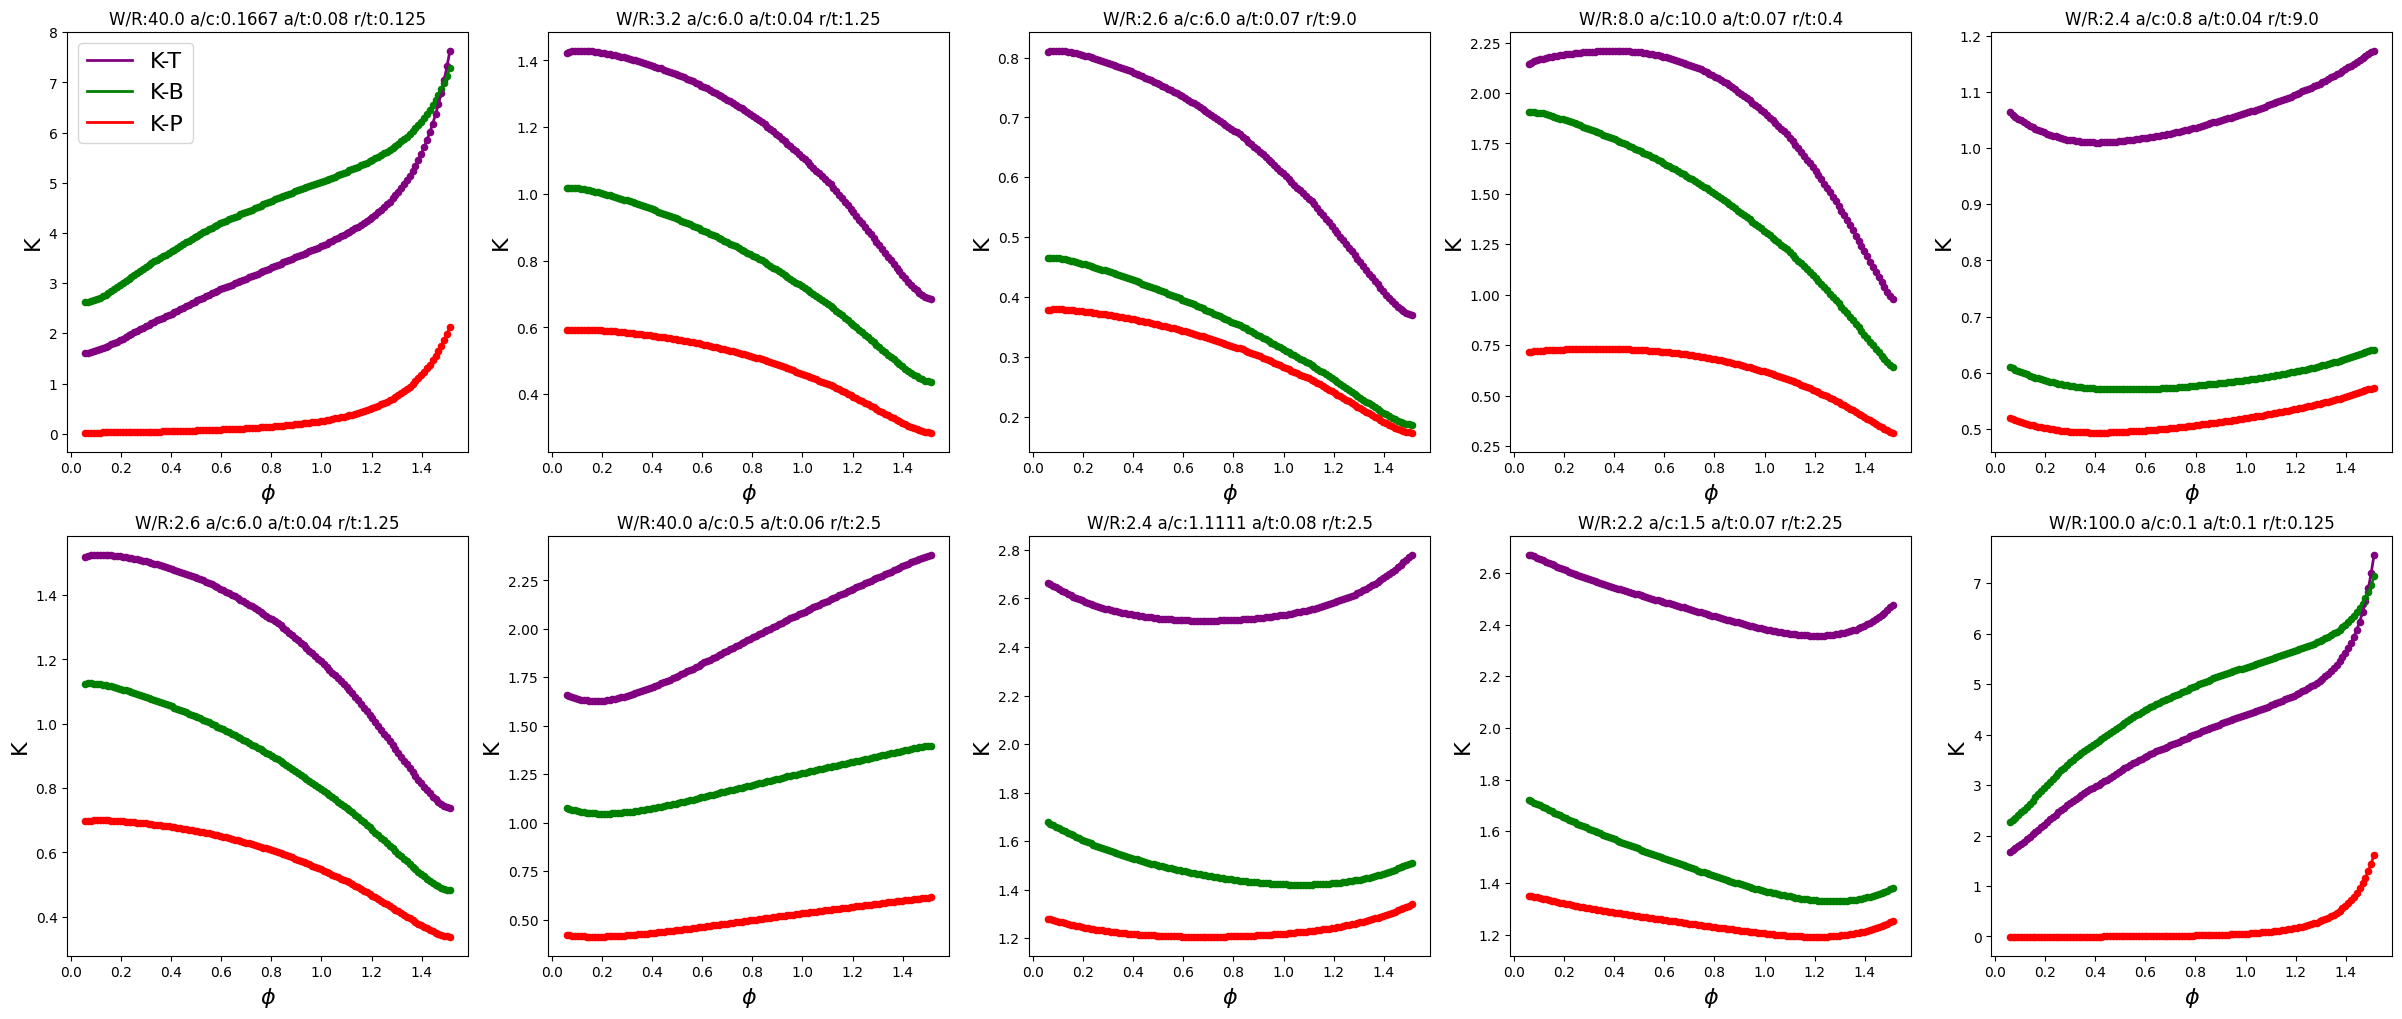

In [5]:
d = df_train.to_numpy()

num_crack = np.unique(d[:,0])

np.random.seed(10)
fig, axs = plt.subplots(2, 5, figsize=(30,12))
for i in range(2):
    for j in range(5):
        idx = np.random.randint(0, len(num_crack))
        data = d[idx*128:idx*128+128]
        W_R = np.unique(data[:,1])
        a_c = np.unique(data[:,2])
        a_t = np.unique(data[:,3])
        r_t = np.unique(data[:,4])

        assert len(W_R) == 1
        assert len(a_c) == 1
        assert len(a_t) == 1
        assert len(r_t) == 1

        axs[i,j].plot(data[:,-4], data[:,-3], label="K-T", color='purple', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-4], data[:,-3], color='purple', s=20)

        axs[i,j].plot(data[:,-4], data[:,-2], label="K-B", color='green', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-4], data[:,-2], color='green', s=20)

        axs[i,j].plot(data[:,-4], data[:,-1], label="K-P", color='red', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-4], data[:,-1], color='red', s=20)

        axs[i,j].set_title("W/R:{} a/c:{} a/t:{} r/t:{}".format(W_R[0], a_c[0], a_t[0], r_t[0]))
        axs[i,j].set_ylabel("K", fontsize=16)
        axs[i,j].set_xlabel(r"$\phi$", fontsize=16)
        
        if i == 0 and j == 0:
            axs[i,j].legend(fontsize=16)

plt.show()

# Testing Data

In [6]:
df_test = pd.read_csv("../files/data/SINGLE_CRACK/CORNER_CRACK_COUNTERSUNK_HOLE/CORNER_CRACK_CS3_QUARTER_ELLIPSE_TEST.csv")
df_test

,c_index,W/R,a/c,a/t,r/t,b/t,phi,K-T,K-B,K-P
0,0.0,2.4,0.1,0.01,0.750,0.25,0.057972,0.429995,0.724687,0.201466
1,0.0,2.4,0.1,0.01,0.750,0.25,0.069428,0.437857,0.737504,0.205187
2,0.0,2.4,0.1,0.01,0.750,0.25,0.080884,0.447299,0.752671,0.209626
3,0.0,2.4,0.1,0.01,0.750,0.25,0.092340,0.457868,0.769862,0.214558
4,0.0,2.4,0.1,0.01,0.750,0.25,0.103796,0.469303,0.788463,0.219925
...,...,...,...,...,...,...,...,...,...,...
2731515,85359.0,40.0,10.0,0.10,1.333,0.25,1.467062,0.678134,0.348650,0.173734
2731516,85359.0,40.0,10.0,0.10,1.333,0.25,1.478518,0.662603,0.340562,0.169772
2731517,85359.0,40.0,10.0,0.10,1.333,0.25,1.489974,0.648277,0.333106,0.166112
2731518,85359.0,40.0,10.0,0.10,1.333,0.25,1.501431,0.635496,0.326390,0.162800


In [7]:
# Get unique combinations of the first four columns
test_combinations = df_test.iloc[:, 1:5].drop_duplicates().to_numpy()

print(len(test_combinations))

21340


In [8]:
print("Different W/R values: ", np.unique(test_combinations[:,0], axis=0))
print("Different a/c values: ", np.unique(test_combinations[:,1], axis=0))
print("Different a/t values: ", np.unique(test_combinations[:,2], axis=0))
print("Different r/t values: ", np.unique(test_combinations[:,3], axis=0))
print("Different phi values: ", np.unique(df_test.iloc[:,6], axis=0))

Different W/R values:  [  1.6   1.8   2.    2.2   2.4   2.6   2.8   3.2   3.6   4.    4.6   5.2
   5.8   6.4   7.    8.    9.   10.   12.   16.   20.   30.   40.  100. ]
Different a/c values:  [ 0.1     0.125   0.1667  0.2     0.25    0.333   0.5     0.667   0.75
  0.8     0.9     1.      1.1111  1.25    1.333   1.5     2.      3.
  6.     10.    ]
Different a/t values:  [0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1 ]
Different r/t values:  [ 0.1     0.111   0.125   0.25    0.333   0.4     0.5714  0.667   0.75
  0.8     1.      1.25    1.333   1.5     2.      2.25    2.5     3.
  4.      5.      7.      9.     10.    ]
Different phi values:  [0.05792282 0.05793267 0.05794252 0.05795237 0.05796221 0.05797206
 0.06937924 0.06938901 0.06939878 0.06940855 0.06941832 0.06942809
 0.08083565 0.08084534 0.08085504 0.08086473 0.08087443 0.08088412
 0.09229206 0.09230168 0.0923113  0.09232092 0.09233053 0.09234015
 0.10374847 0.10375802 0.10376756 0.1037771  0.10378664 0.10379618
 0.11520489

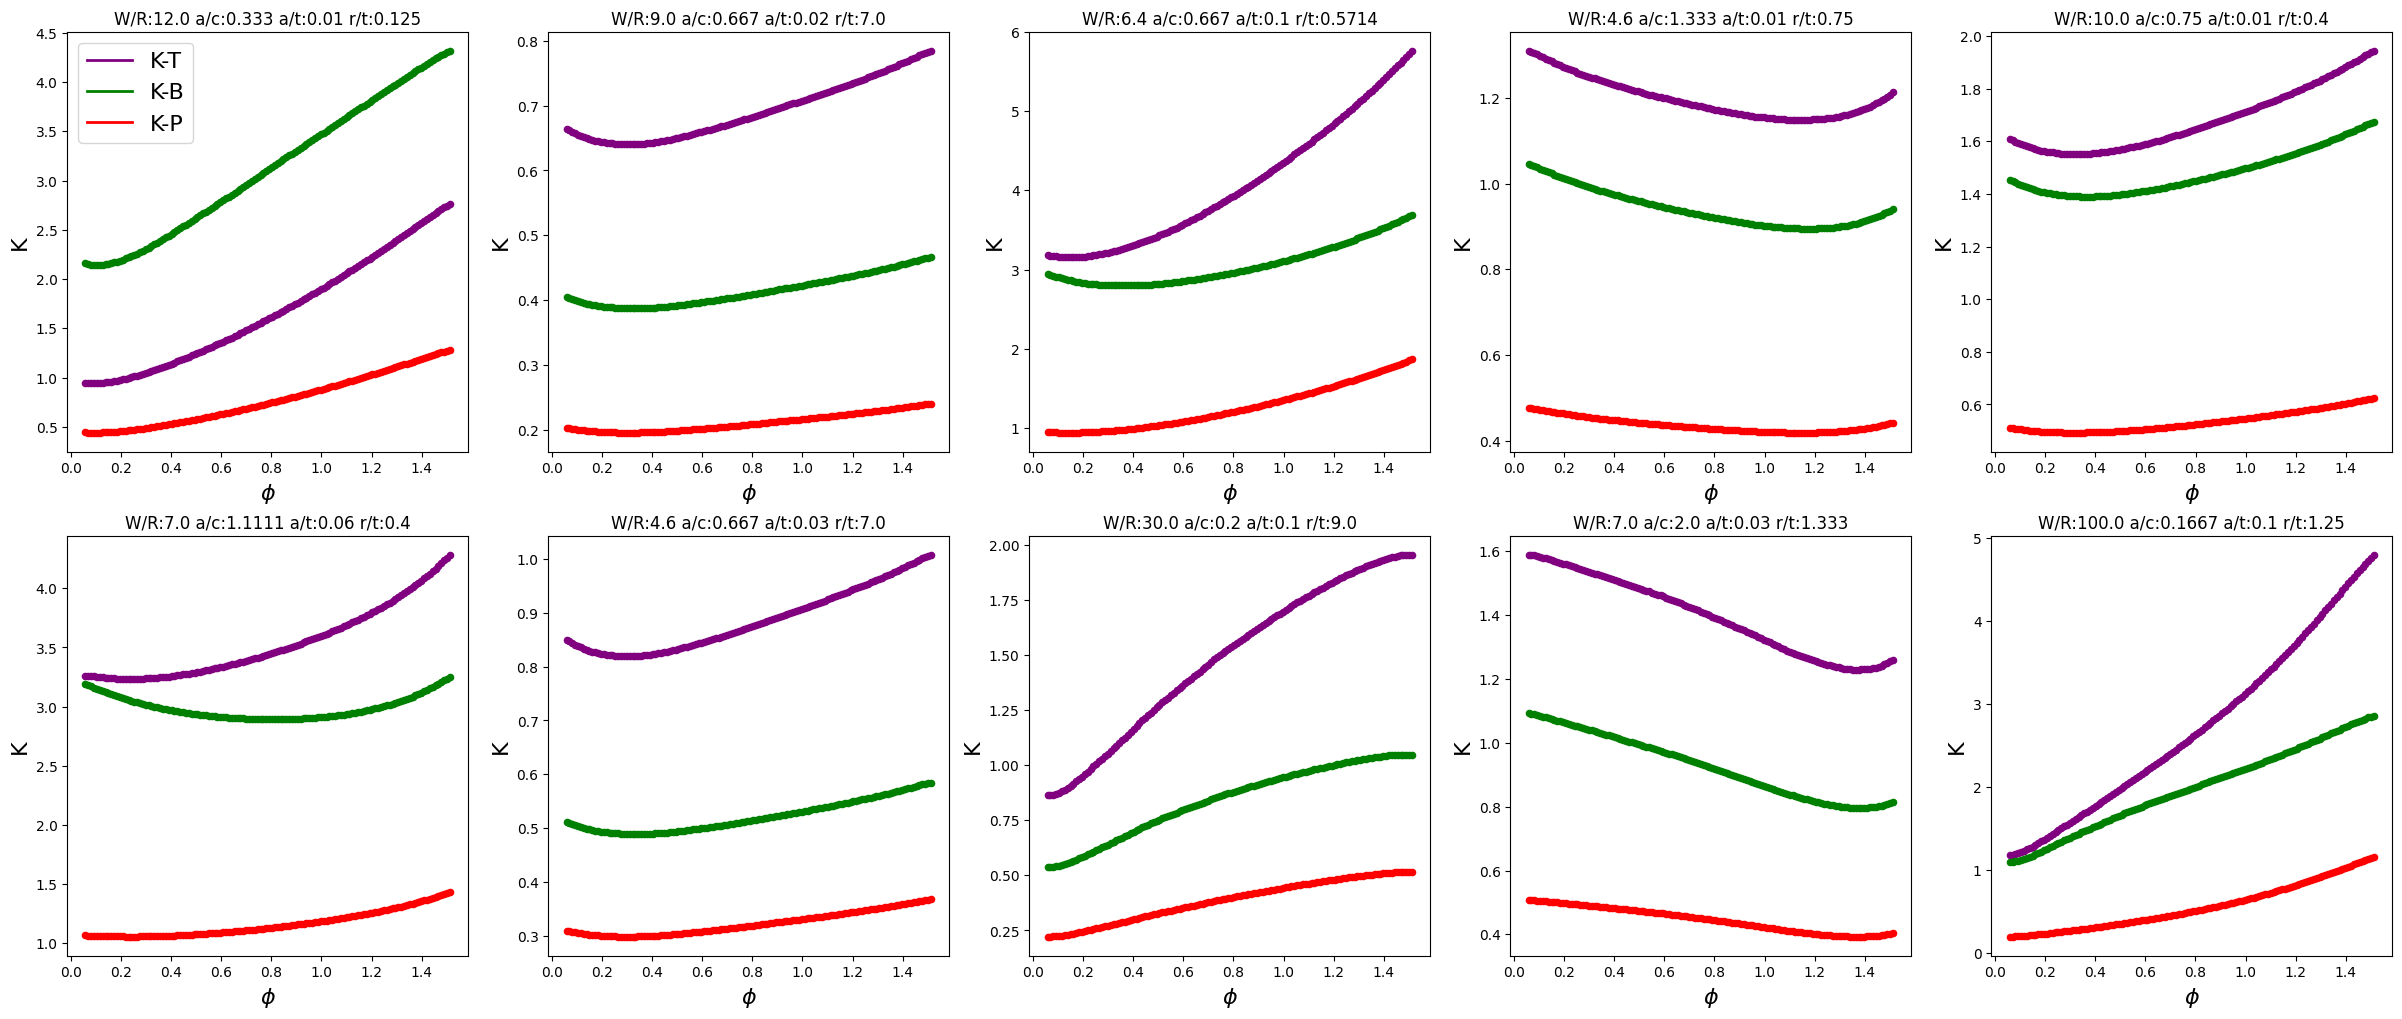

In [9]:
d = df_test.to_numpy()

num_crack = np.unique(d[:,0])

np.random.seed(100)
fig, axs = plt.subplots(2, 5, figsize=(30,12))
for i in range(2):
    for j in range(5):
        idx = np.random.randint(0, len(num_crack))
        data = d[idx*128:idx*128+128]
        W_R = np.unique(data[:,1])
        a_c = np.unique(data[:,2])
        a_t = np.unique(data[:,3])
        r_t = np.unique(data[:,4])

        assert len(W_R) == 1
        assert len(a_c) == 1
        assert len(a_t) == 1
        assert len(r_t) == 1

        axs[i,j].plot(data[:,-4], data[:,-3], label="K-T", color='purple', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-4], data[:,-3], color='purple', s=20)

        axs[i,j].plot(data[:,-4], data[:,-2], label="K-B", color='green', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-4], data[:,-2], color='green', s=20)

        axs[i,j].plot(data[:,-4], data[:,-1], label="K-P", color='red', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-4], data[:,-1], color='red', s=20)

        axs[i,j].set_title("W/R:{} a/c:{} a/t:{} r/t:{}".format(W_R[0], a_c[0], a_t[0], r_t[0]))
        axs[i,j].set_ylabel("K", fontsize=16)
        axs[i,j].set_xlabel(r"$\phi$", fontsize=16)
        
        if i == 0 and j == 0:
            axs[i,j].legend(fontsize=16)

plt.show()